In [1]:
import os
import numpy as np
import pandas as pd
import nltk
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.rcParams['figure.dpi'] = 200
sns.set_style("white")

In [2]:
df = pd.read_csv("netflix.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [3]:
# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


- 5 columns have missing values, with Director missing 1/3 of the time

# Data Description

- show_id: A unique identifier for each show (movie or TV show).
- type: The type of the show, which can be either "Movie" or "TV Show".
- title: The title or name of the show.
- director: The director of the show. Some entries might not have director information and are shown as NaN (Not a Number).
- cast: The list of actors in the show, separated by commas. Some entries might not have cast information and are shown as NaN.
- country: The country where the show was produced. Some entries might not have country information and are shown as NaN.
- date_added: The date the show was added to Netflix, typically in the format "Month Day, Year".
- release_year: The year the show was released.
- rating: The rating of the show, such as "PG-13", "TV-MA", etc., indicating the appropriate audience or content rating.
- duration: The duration of the show. For movies, this usually indicates the number of minutes (e.g., "90 min"); for TV shows, this usually indicates the number of seasons (e.g., "1 Season" or "2 Seasons").
- listed_in: The categories or genres of the show, separated by commas (e.g., "Documentaries").
- description: A brief description or summary of the show.
- month_added: The month extracted from date_add column
- month_name_added: The month extracted from date_add column
- year_added:  The year extracted from date_add column

# Data Assessment
## Data Cleaning
Because the dataset has small percentage of missing data, I will :
- The missing values are in `director` is replaced with `No Data`
- Replace blank countries with the mode (most common) country
- I keep `director` as it could be interesting to look at a certain director's films later on
- I add 2 more columns from the `added_date` to help future analysis

In [4]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)
# Add year and month columns
df['date_added'] = df.date_added.str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])


df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


## Initial Assessment
Before visualizing some key information, I want to see the overall analysis of both numberic and categorical variables to form initital opinion. After that, I will decide the direction I want to analyze Netflix dataset

In [5]:
# Descriptive statistic for categorical variables
df.describe(include=['object'])

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,month_name_added
count,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,681,14,216,491,7752,12
top,s1,Movie,3%,No Data,No Data,United States,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...,December
freq,1,5372,1,2376,718,3051,2861,1606,334,3,832


In [6]:
# Descriptive statistic for numeric variables
df.describe(exclude=['object'])

,date_added,release_year,month_added,year_added
count,7770,7770.000000,7770.000000,7770.000000
mean,2019-01-03 10:15:28.494208512,2013.935393,6.784942,2018.494981
min,2008-01-01 00:00:00,1925.000000,1.000000,2008.000000
25%,2018-02-01 00:00:00,2013.000000,4.000000,2018.000000
50%,2019-03-08 00:00:00,2017.000000,7.000000,2019.000000
75%,2020-01-20 00:00:00,2018.000000,10.000000,2020.000000
max,2021-01-16 00:00:00,2021.000000,12.000000,2021.000000
std,NaN,8.764357,3.591219,1.387582



There are some interesting features from these examples that can be used as general guidance for pre-processing or further exploration:
-  **Movie** has more distribution than TV series
-  **Documentaries** category has many content production among categories
-  **United State** might be the target country
-  The year **2020** has the **top year content distribution**, However, this dataset contains data upto year 2021; therefore, I assume we will see **the decline pattern in content distribution from 2020 to 2021**. This assumption needs further analysis to clarify and it will be the main pillar to my subset sections.

# Data Exploration
## Categorical Variables

In this dataset, Netflix has 2 main content types, which are Movies and TV Series. There is different measurement in `duration` column between Movie and TV Show. For example movie is counted by minute while TV show is counted for season containing many espisodes. However, because we can't tranform the season into exact minute, I will analyze the distribution of size between the 2 types purely based on `type` column, not `duration`. This is the limitation of this dataset and analysis.

Therefore, I will analyze the streaming platform **2 content types' distribution over years, months and countries**

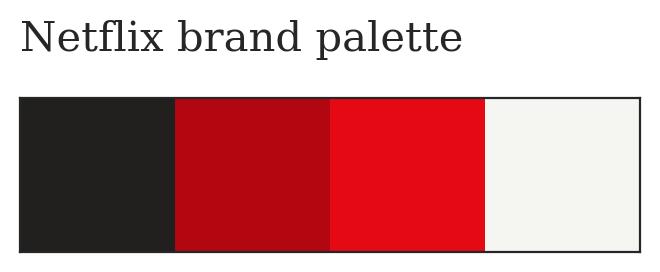

In [7]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### Movies and TV Show Distribution 

In [8]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

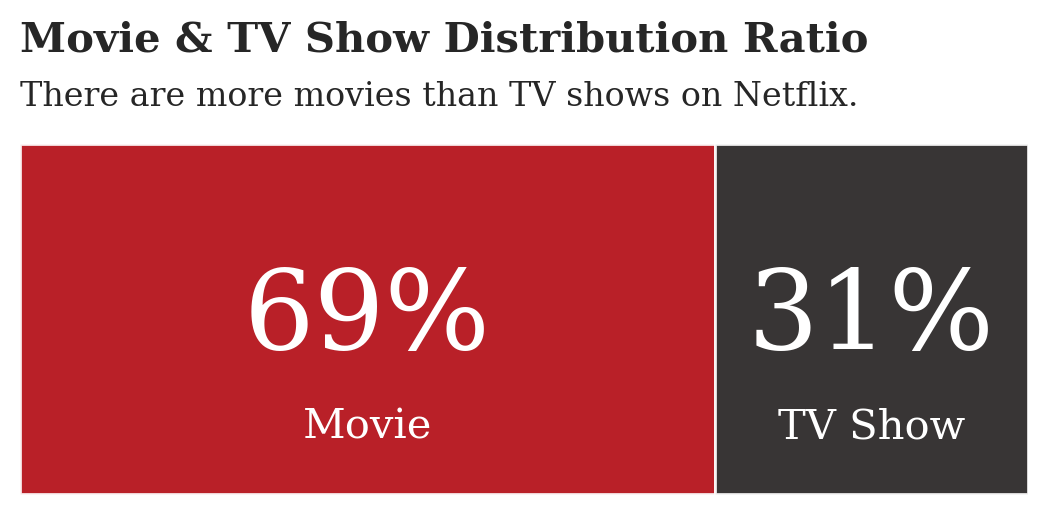

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show Distribution Ratio', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'There are more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

ax.spines[:].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.savefig("images/dis_ratios.png", bbox_inches='tight', dpi=300)
plt.show()

## By Country¶
So we now know there are much more movies than TV shows on Netflix (which surprises me!).

What about if we look at content by country?

I would imagine that the USA will have the most content. I wonder how my country, the UK, will compare?

In [10]:
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

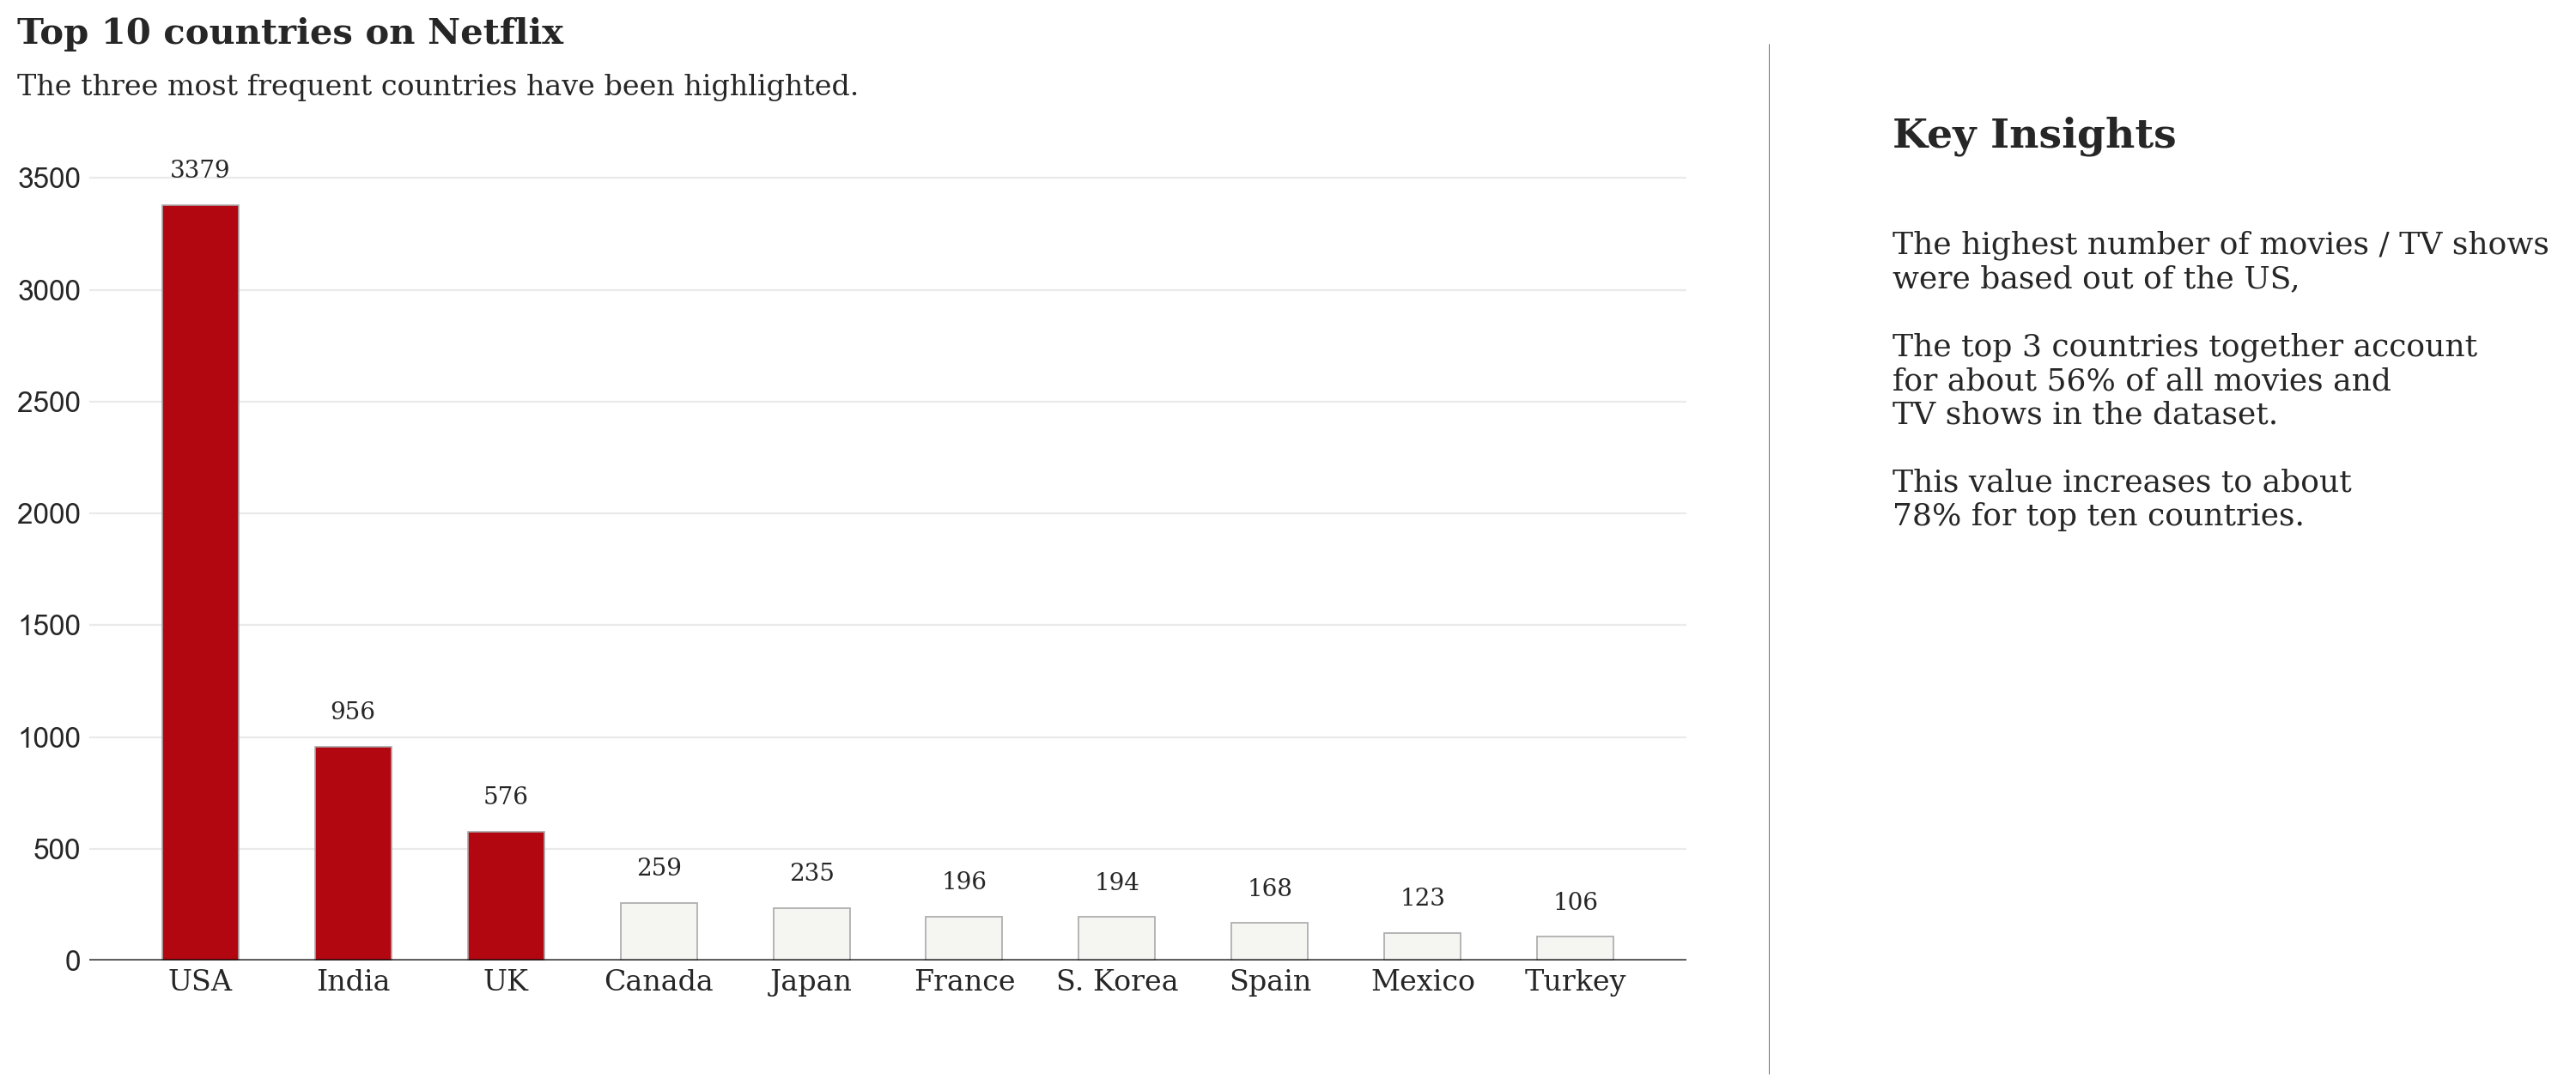

In [11]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot
ax.spines[:].set_visible(False)
    
# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.0, 0.9, 'Key Insights', fontsize=17, fontweight='bold', fontfamily='serif')

fig.text(1.0, 0.50, '''
The highest number of movies / TV shows 
were based out of the US, 

The top 3 countries together account 
for about 56% of all movies and 
TV shows in the dataset.

This value increases to about 
78% for top ten countries.
'''
         , fontsize=13, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

import matplotlib.lines as lines
l1 = lines.Line2D([0.94, 0.94], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis='both', which='both',length=0)
plt.savefig("images/top10_country.png", bbox_inches='tight', dpi=300)
plt.show()

# As predicted, the USA dominates.

The UK is a top contender too, but still some way behind India.

How does content by country vary?

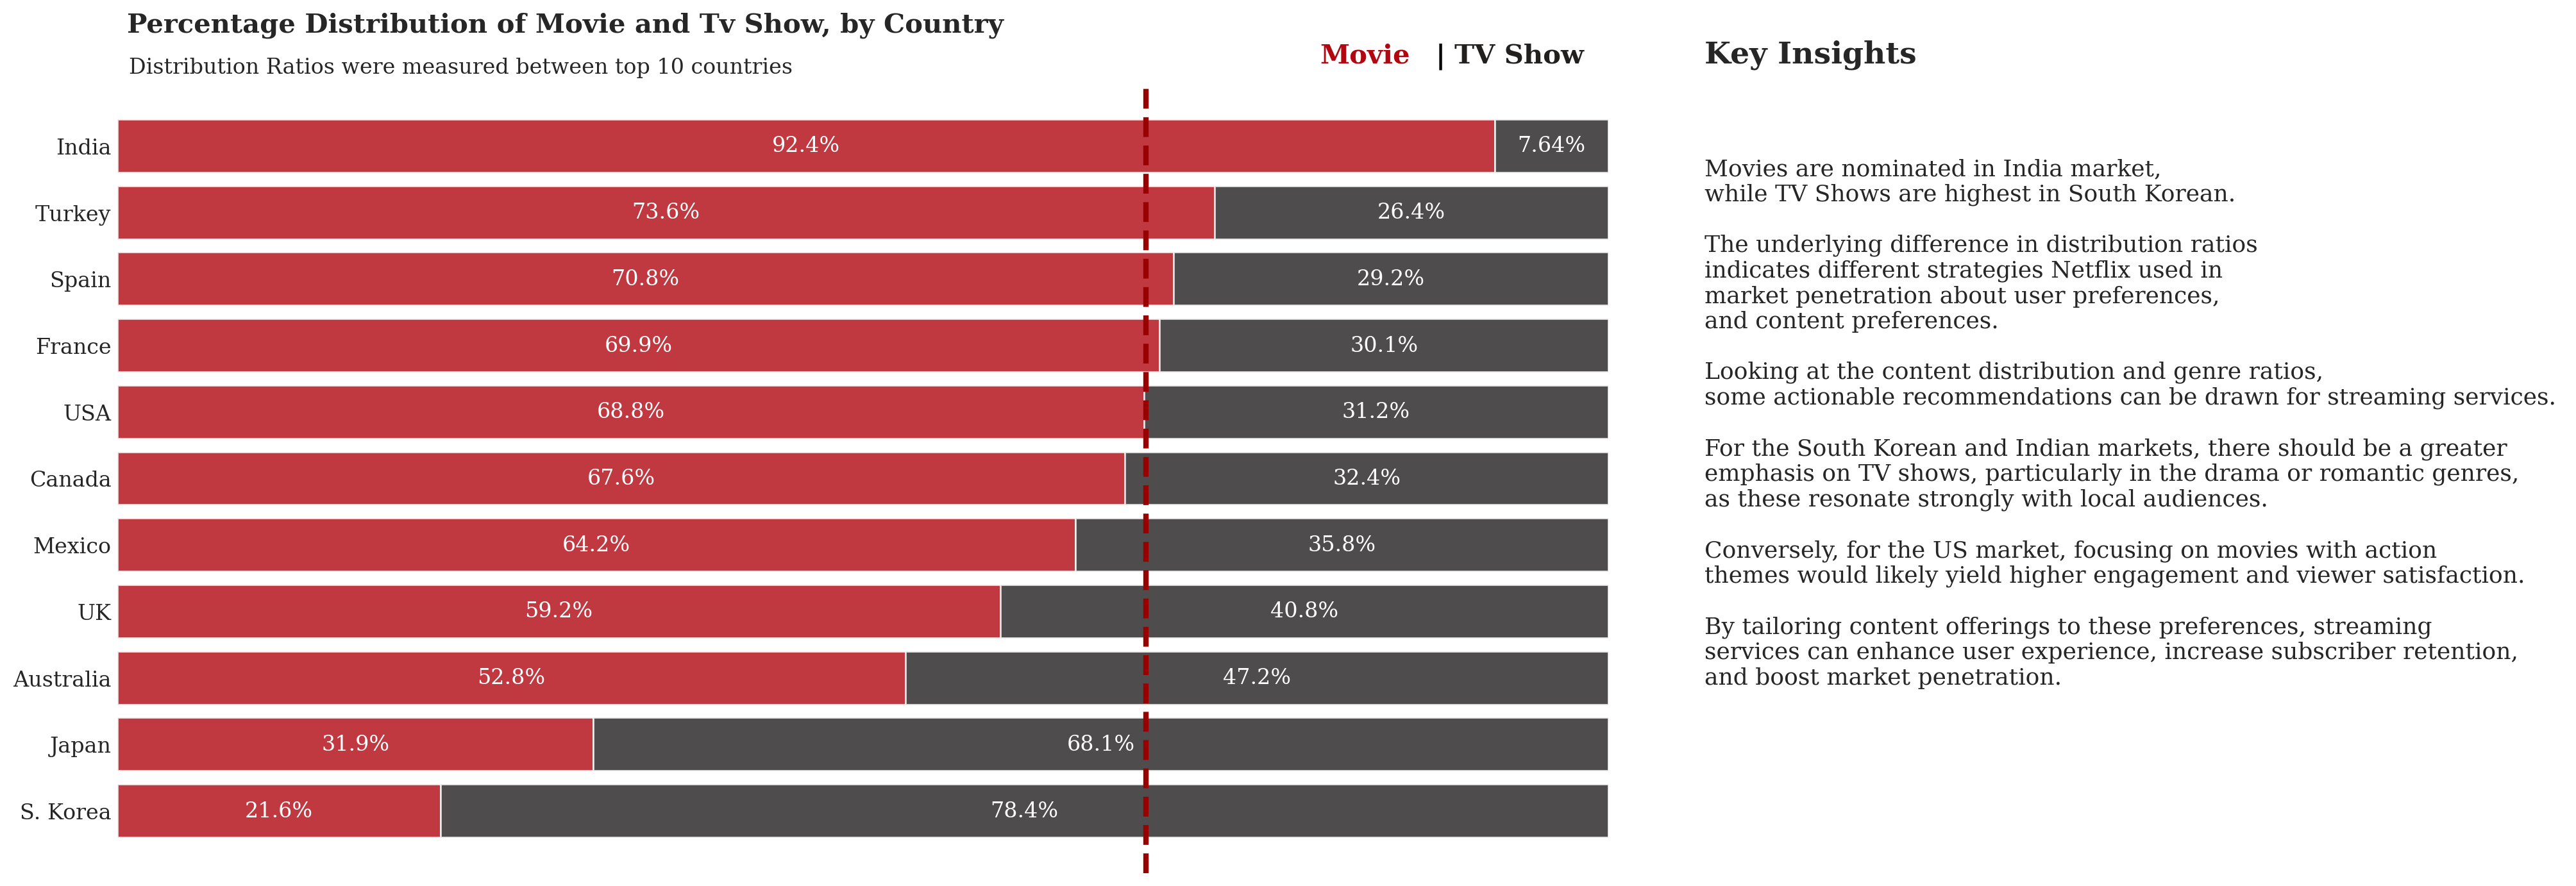

In [12]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


###
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Percentage Distribution of Movie and Tv Show, by Country', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Distribution Ratios were measured between top 10 countries', fontsize=12,fontfamily='serif')   

ax.spines[:].set_visible(False)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(0.95, 0.9, 'Key Insights', fontsize=17, fontweight='bold', fontfamily='serif')

fig.text(0.95, 0.27, '''
Movies are nominated in India market,
while TV Shows are highest in South Korean.

The underlying difference in distribution ratios
indicates different strategies Netflix used in
market penetration about user preferences,
and content preferences.

Looking at the content distribution and genre ratios, 
some actionable recommendations can be drawn for streaming services. 

For the South Korean and Indian markets, there should be a greater 
emphasis on TV shows, particularly in the drama or romantic genres,
as these resonate strongly with local audiences. 

Conversely, for the US market, focusing on movies with action 
themes would likely yield higher engagement and viewer satisfaction. 

By tailoring content offerings to these preferences, streaming 
services can enhance user experience, increase subscriber retention, 
and boost market penetration.
'''
         , fontsize=13, fontweight='light', fontfamily='serif')
ax.axvline(0.69, ls='--', color='#990000', linewidth= 3)
#import matplotlib.lines as lines
#l1 = lines.Line2D([0.68, 1],[0.68, 0], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
#fig.lines.extend([l1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig("images/dis_ratios_country.png", bbox_inches='tight', dpi=300)
plt.show()


# Ratings
Let's briefly check out how ratings are distributed

In [13]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

In [14]:
print(rating_order)

['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17']


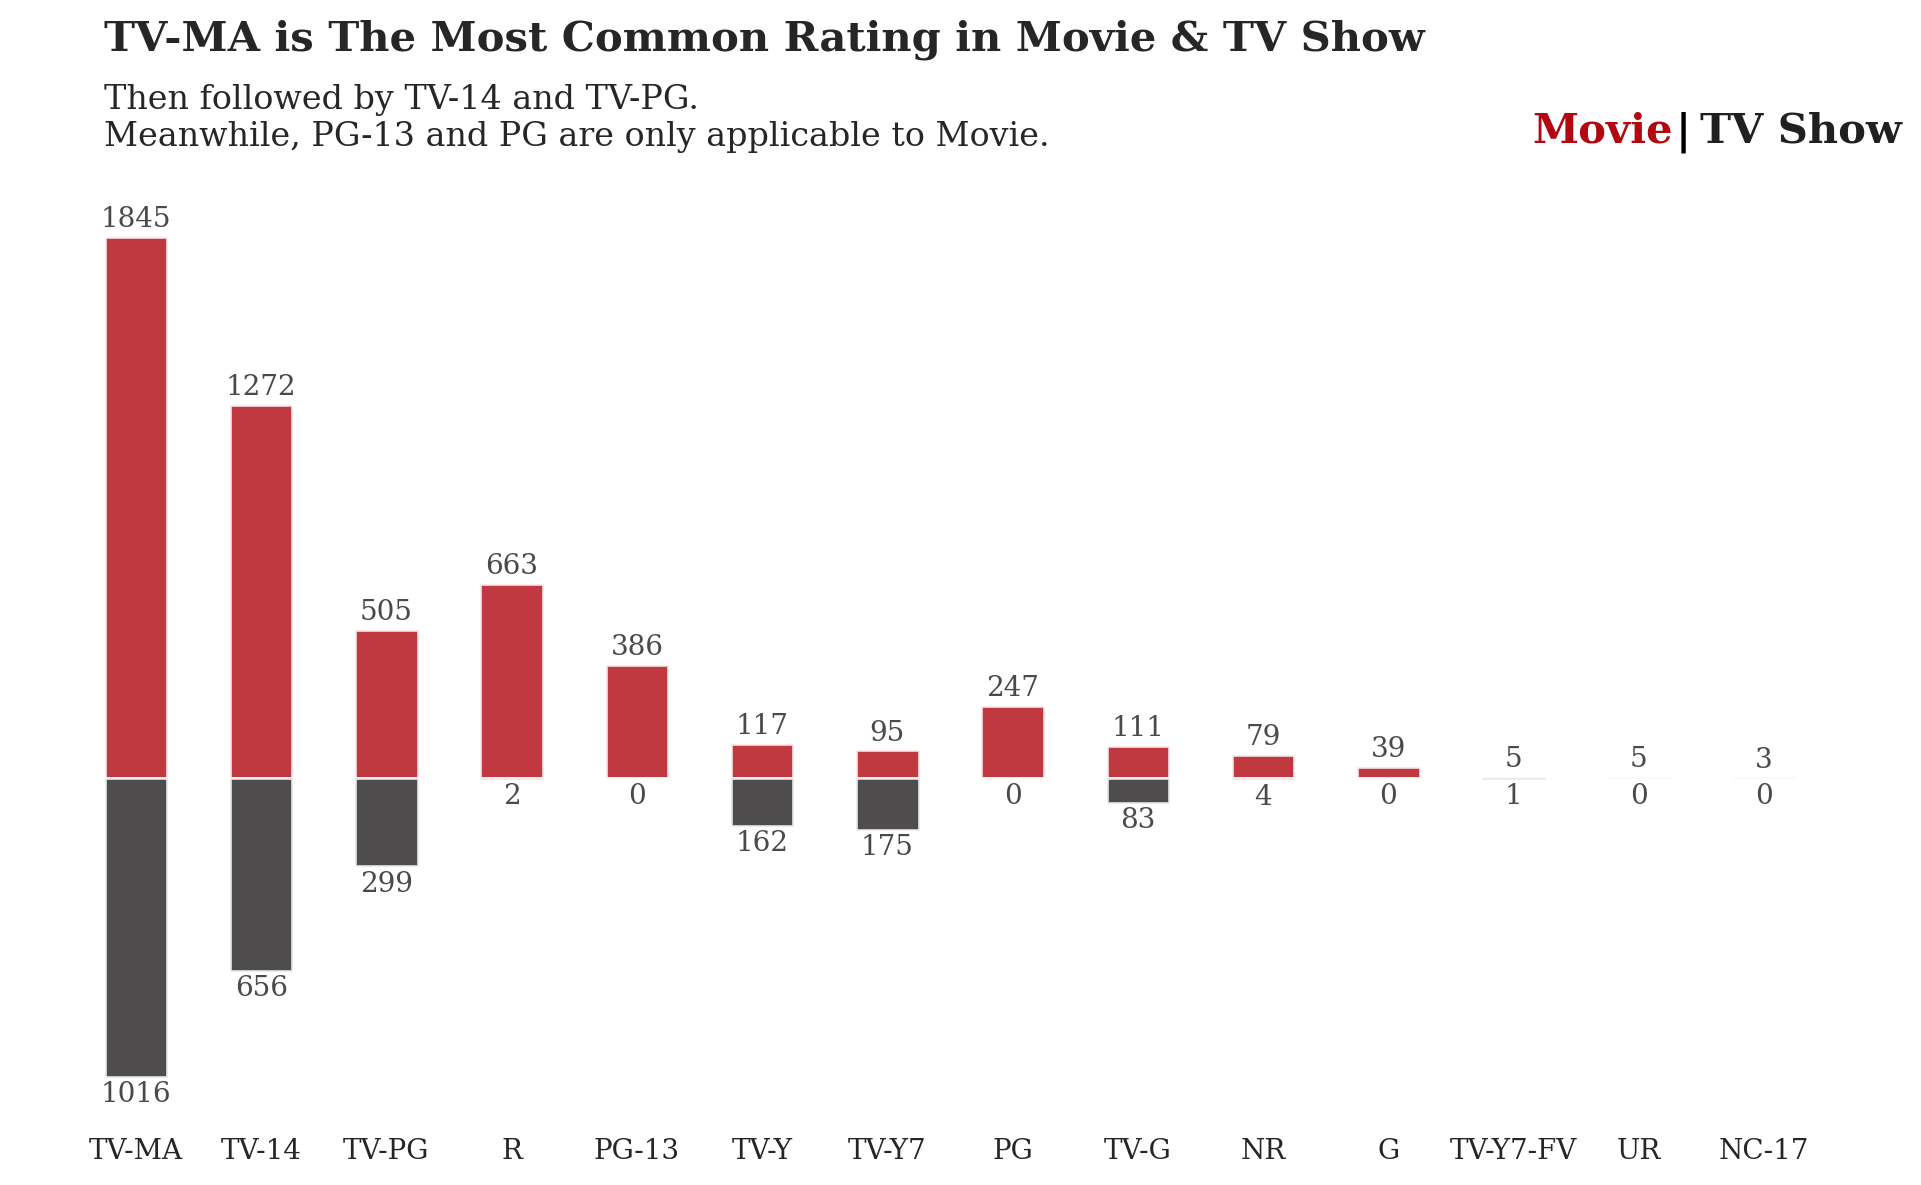

In [15]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

ax.spines[:].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'TV-MA is The Most Common Rating in Movie & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
''' 
Then followed by TV-14 and TV-PG.
Meanwhile, PG-13 and PG are only applicable to Movie.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.savefig("images/rating_plot1.png", bbox_inches='tight', dpi=300)
plt.show()

# How has content been added over the years?¶
As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.

The increase is Movie content is remarkable.

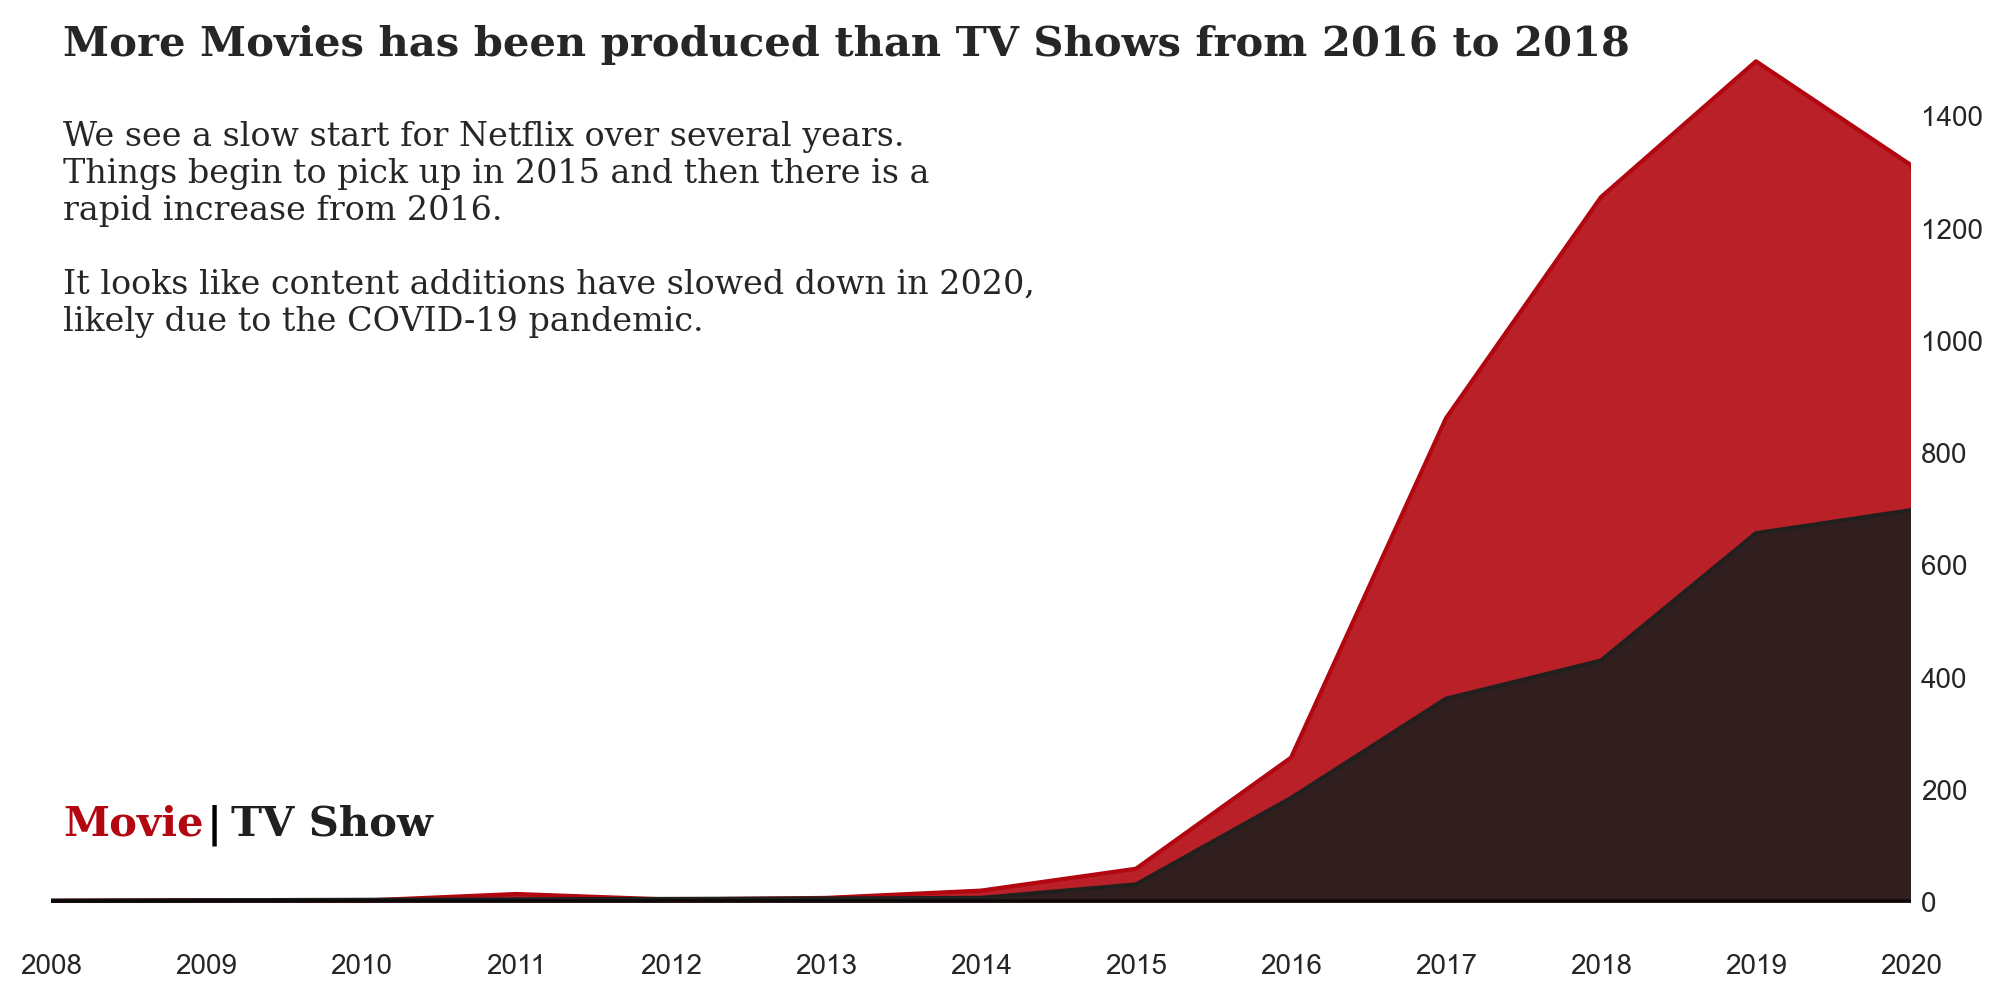

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'More Movies has been produced than TV Shows from 2016 to 2018', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# We can view the same plot, but as a cumulative total...

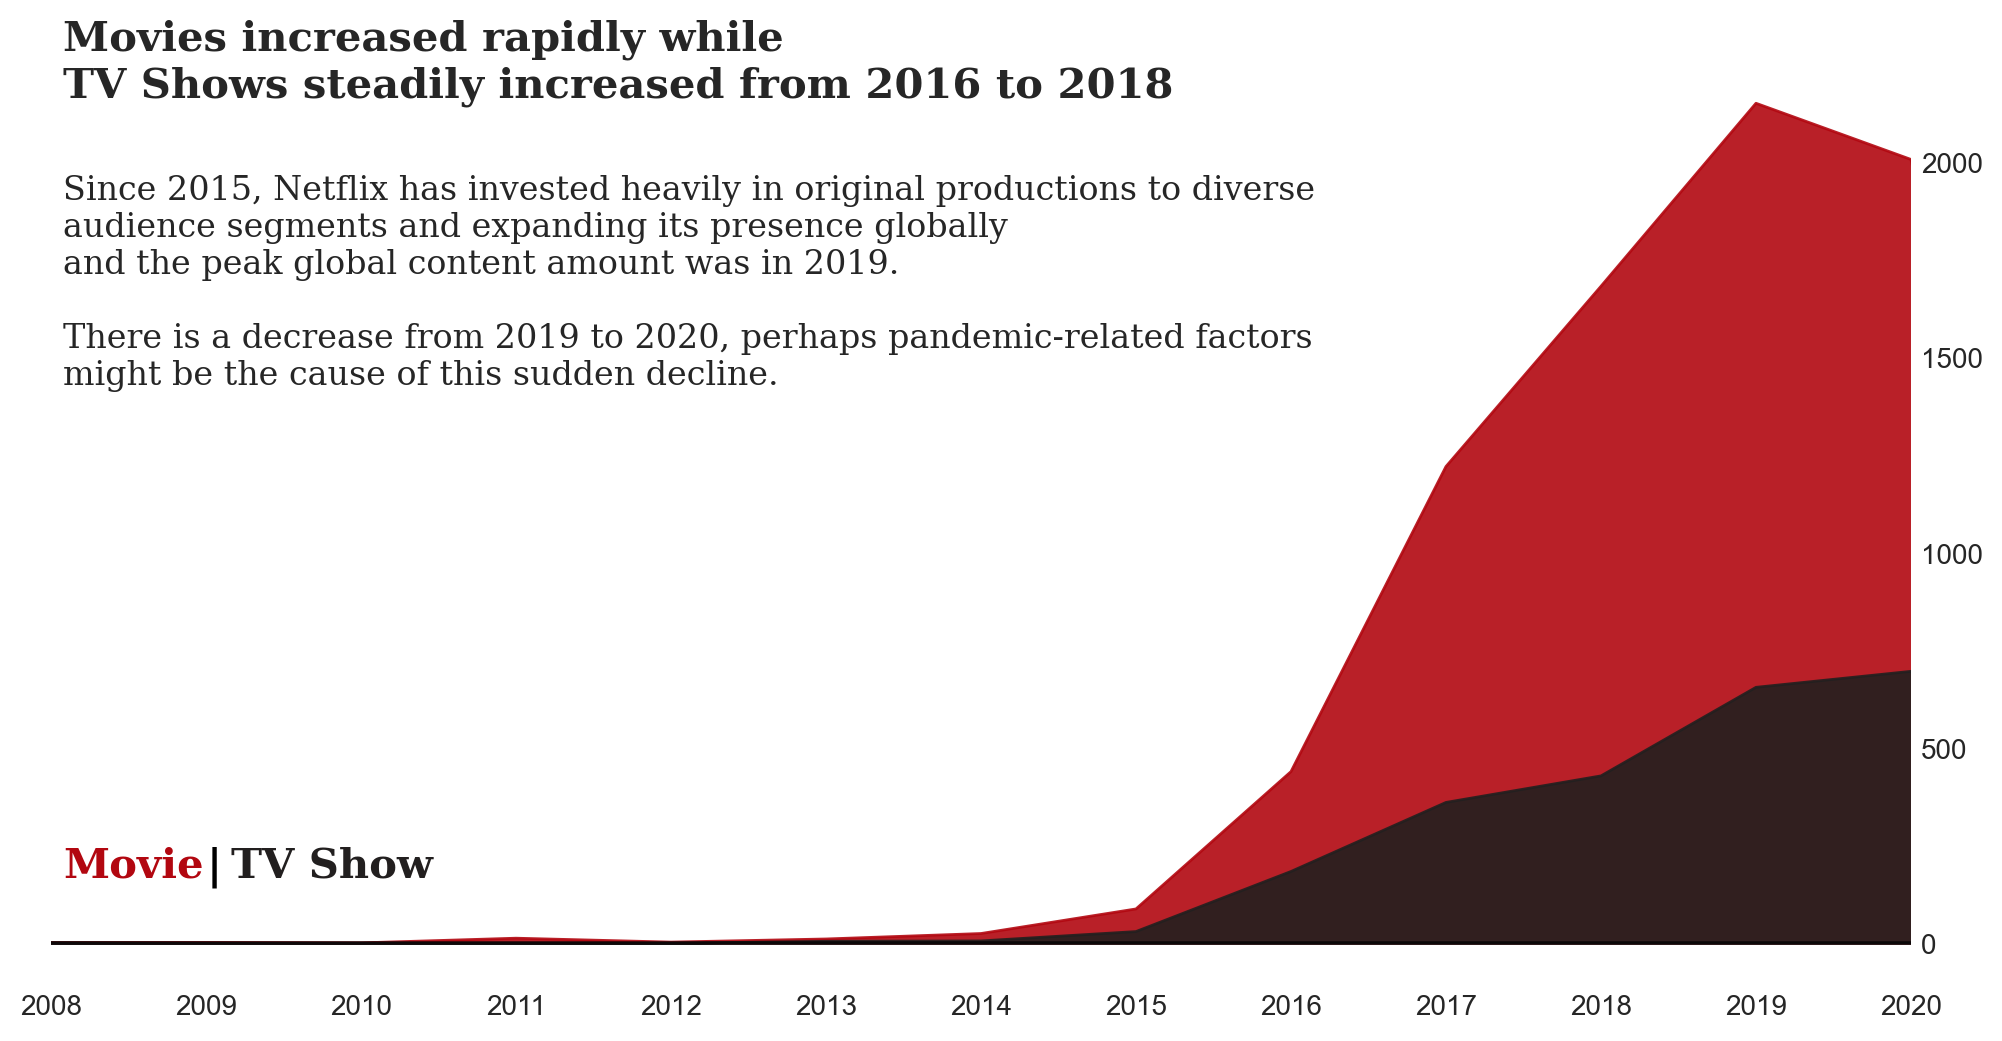

In [17]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
ax.spines[:].set_visible(False)
ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, '''Movies increased rapidly while 
TV Shows steadily increased from 2016 to 2018''', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Since 2015, Netflix has invested heavily in original productions to diverse
audience segments and expanding its presence globally
and the peak global content amount was in 2019.

There is a decrease from 2019 to 2020, perhaps pandemic-related factors
might be the cause of this sudden decline.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig("images/rating_line.png", bbox_inches='tight', dpi=300)
plt.show()

# Month-by-Month
We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

I'll show this in a couple of ways - a cumulative year view, and also as a radial plot...

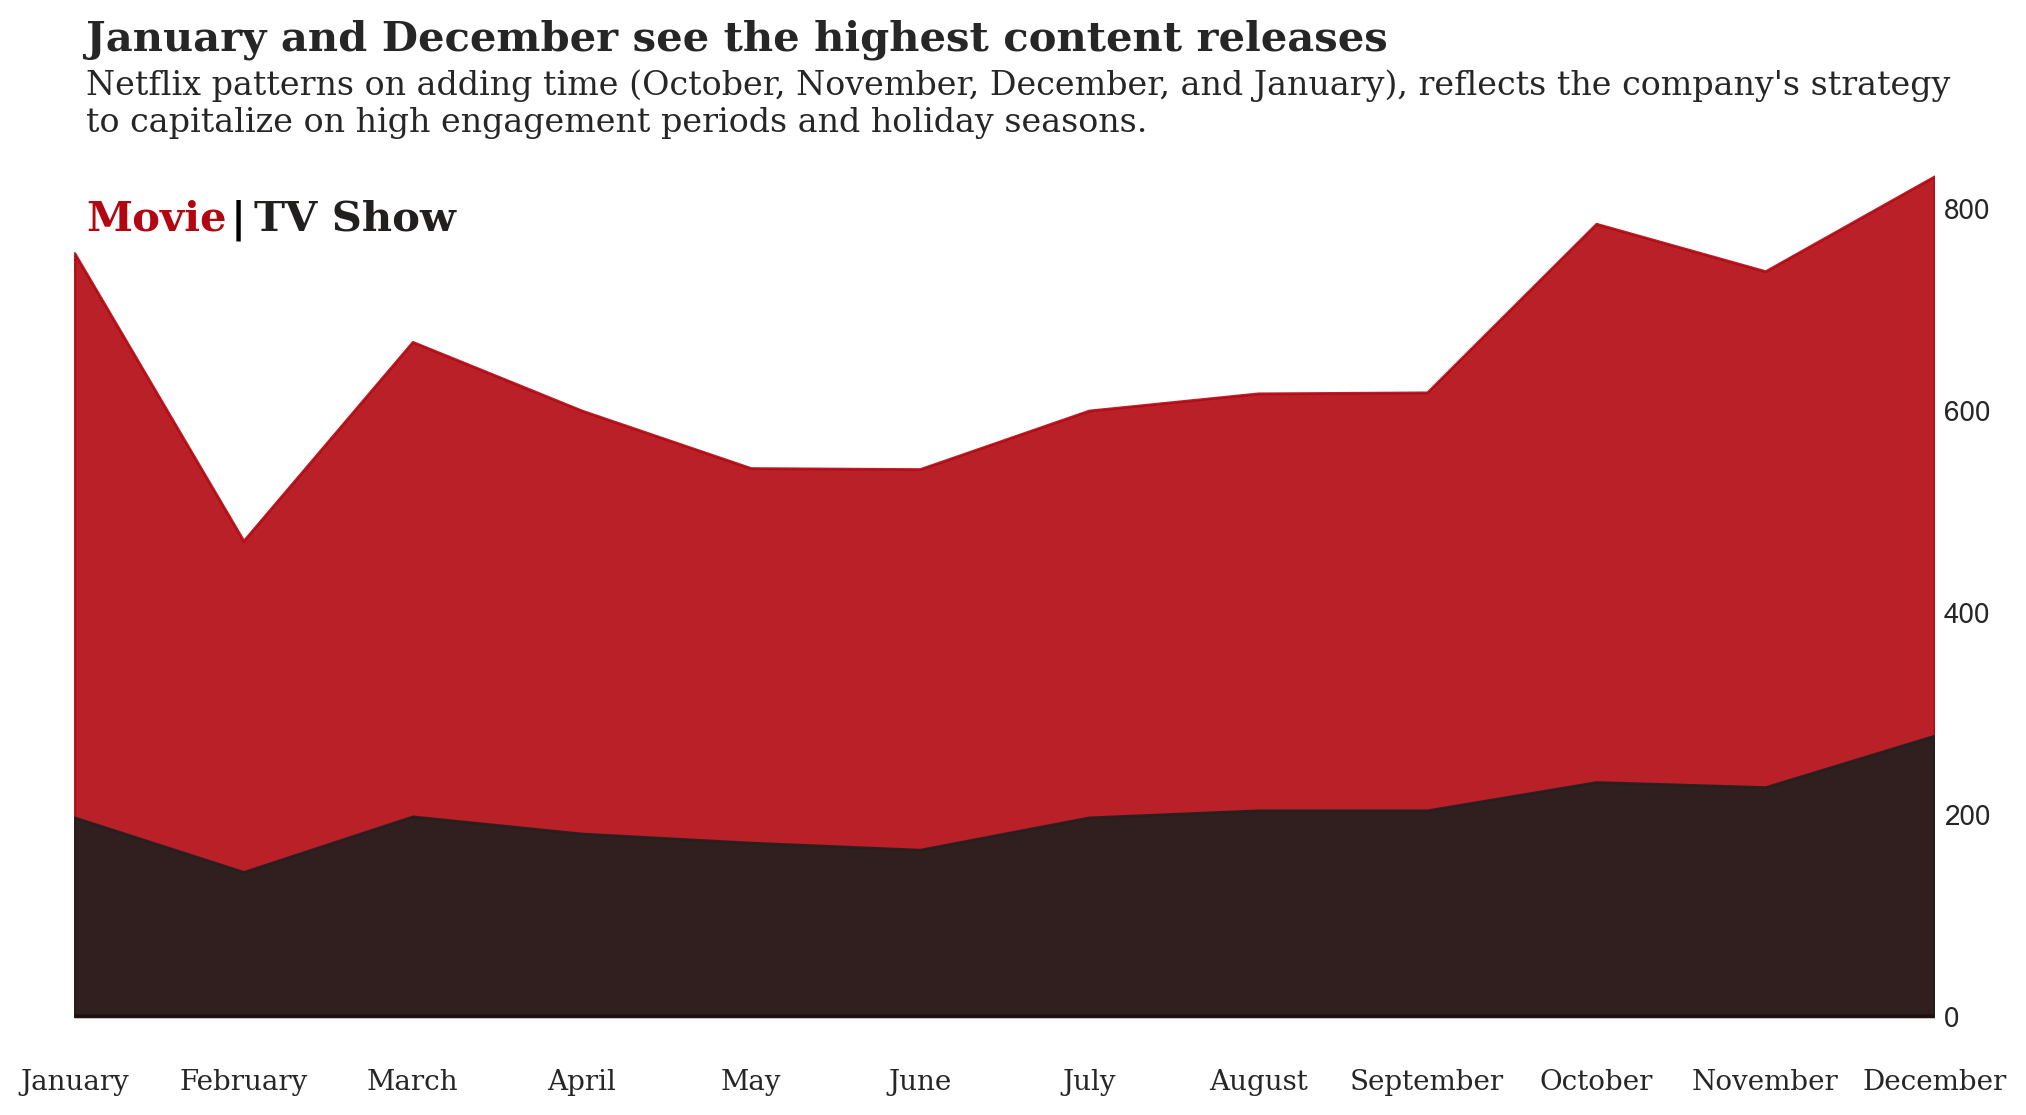

In [18]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
        
ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

ax.spines[:].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'January and December see the highest content releases', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.852, 
'''
Netflix patterns on adding time (October, November, December, and January), reflects the company's strategy 
to capitalize on high engagement periods and holiday seasons.
'''
, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.80,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.80,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.80,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig("images/month_trend", bbox_inches='tight', dpi=300)
plt.show()

According to data capturing Netflix patterns on adding time, the company releases most of its content at the end and beginning of each year. This strategy is designed to take advantage of peak viewing periods and increased user engagement.

# Movie Genres


In [41]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    if title == "Movie":
        fig, ax = plt.subplots(figsize=(15, 10), dpi=200)
        fig.text(0.84,0.90,
                 '''International Movies rarely have Family & Children's genre, 
                 highlighting the importance of cultural considerations
                 in content preferences.
               ''', fontfamily='serif',fontweight='bold',fontsize=14, ha='right')
        fig.text(0.84,0.73,
        '''Family and Children, along with Stand-up Comedy, 
        exhibit a negative correlation with International Movies. 
        
        This trend reveals Netflix's strategic content distribution 
         to remain relevant and appealing across different markets.
         
        Drama, on the other hand, is a genre that is favored in 
        both International and Independent Movies.
         ''', fontfamily='serif',fontsize=11,ha='right')
        pl = sns.heatmap(corr, mask=mask, cmap= cmap, vmax=.4, vmin=-.4, center=0, 
                         square=True, linewidths=2.5)
        plt.tight_layout()
        plt.savefig("images/movie_heatmap", bbox_inches='tight', dpi=300)
    else:
        fig, ax = plt.subplots(figsize=(15, 10), dpi=200)
        fig.text(0.84,.95,
                 '''Romatic and Drama are having strong positive correlation
                 with International TV Shows as well'''
                 , fontfamily='serif',fontweight='bold',fontsize=14, ha='right')
        fig.text(0.84,0.78,
        '''This suggests that its themes and narratives have a 
        broad appeal, highlighting its strong cross-cultural relevance 
        and effectiveness in engaging diverse audiences worldwide.

        There are some positive correlation relationships such as 
        Fantasy vs. Action and Adventure; 
        and Science and Nature vs. Documentaries
         ''', fontfamily='serif',fontsize=11,ha='right')
        pl = sns.heatmap(corr, mask=mask, cmap= cmap, vmax=.4, vmin=-.4, center=0,
                         square=True, linewidths=2.5)
        plt.tight_layout()
        plt.savefig("images/tv_heatmap", bbox_inches='tight', dpi=300)
    plt.show()


There are 20 types in the Netflix Movie Dataset


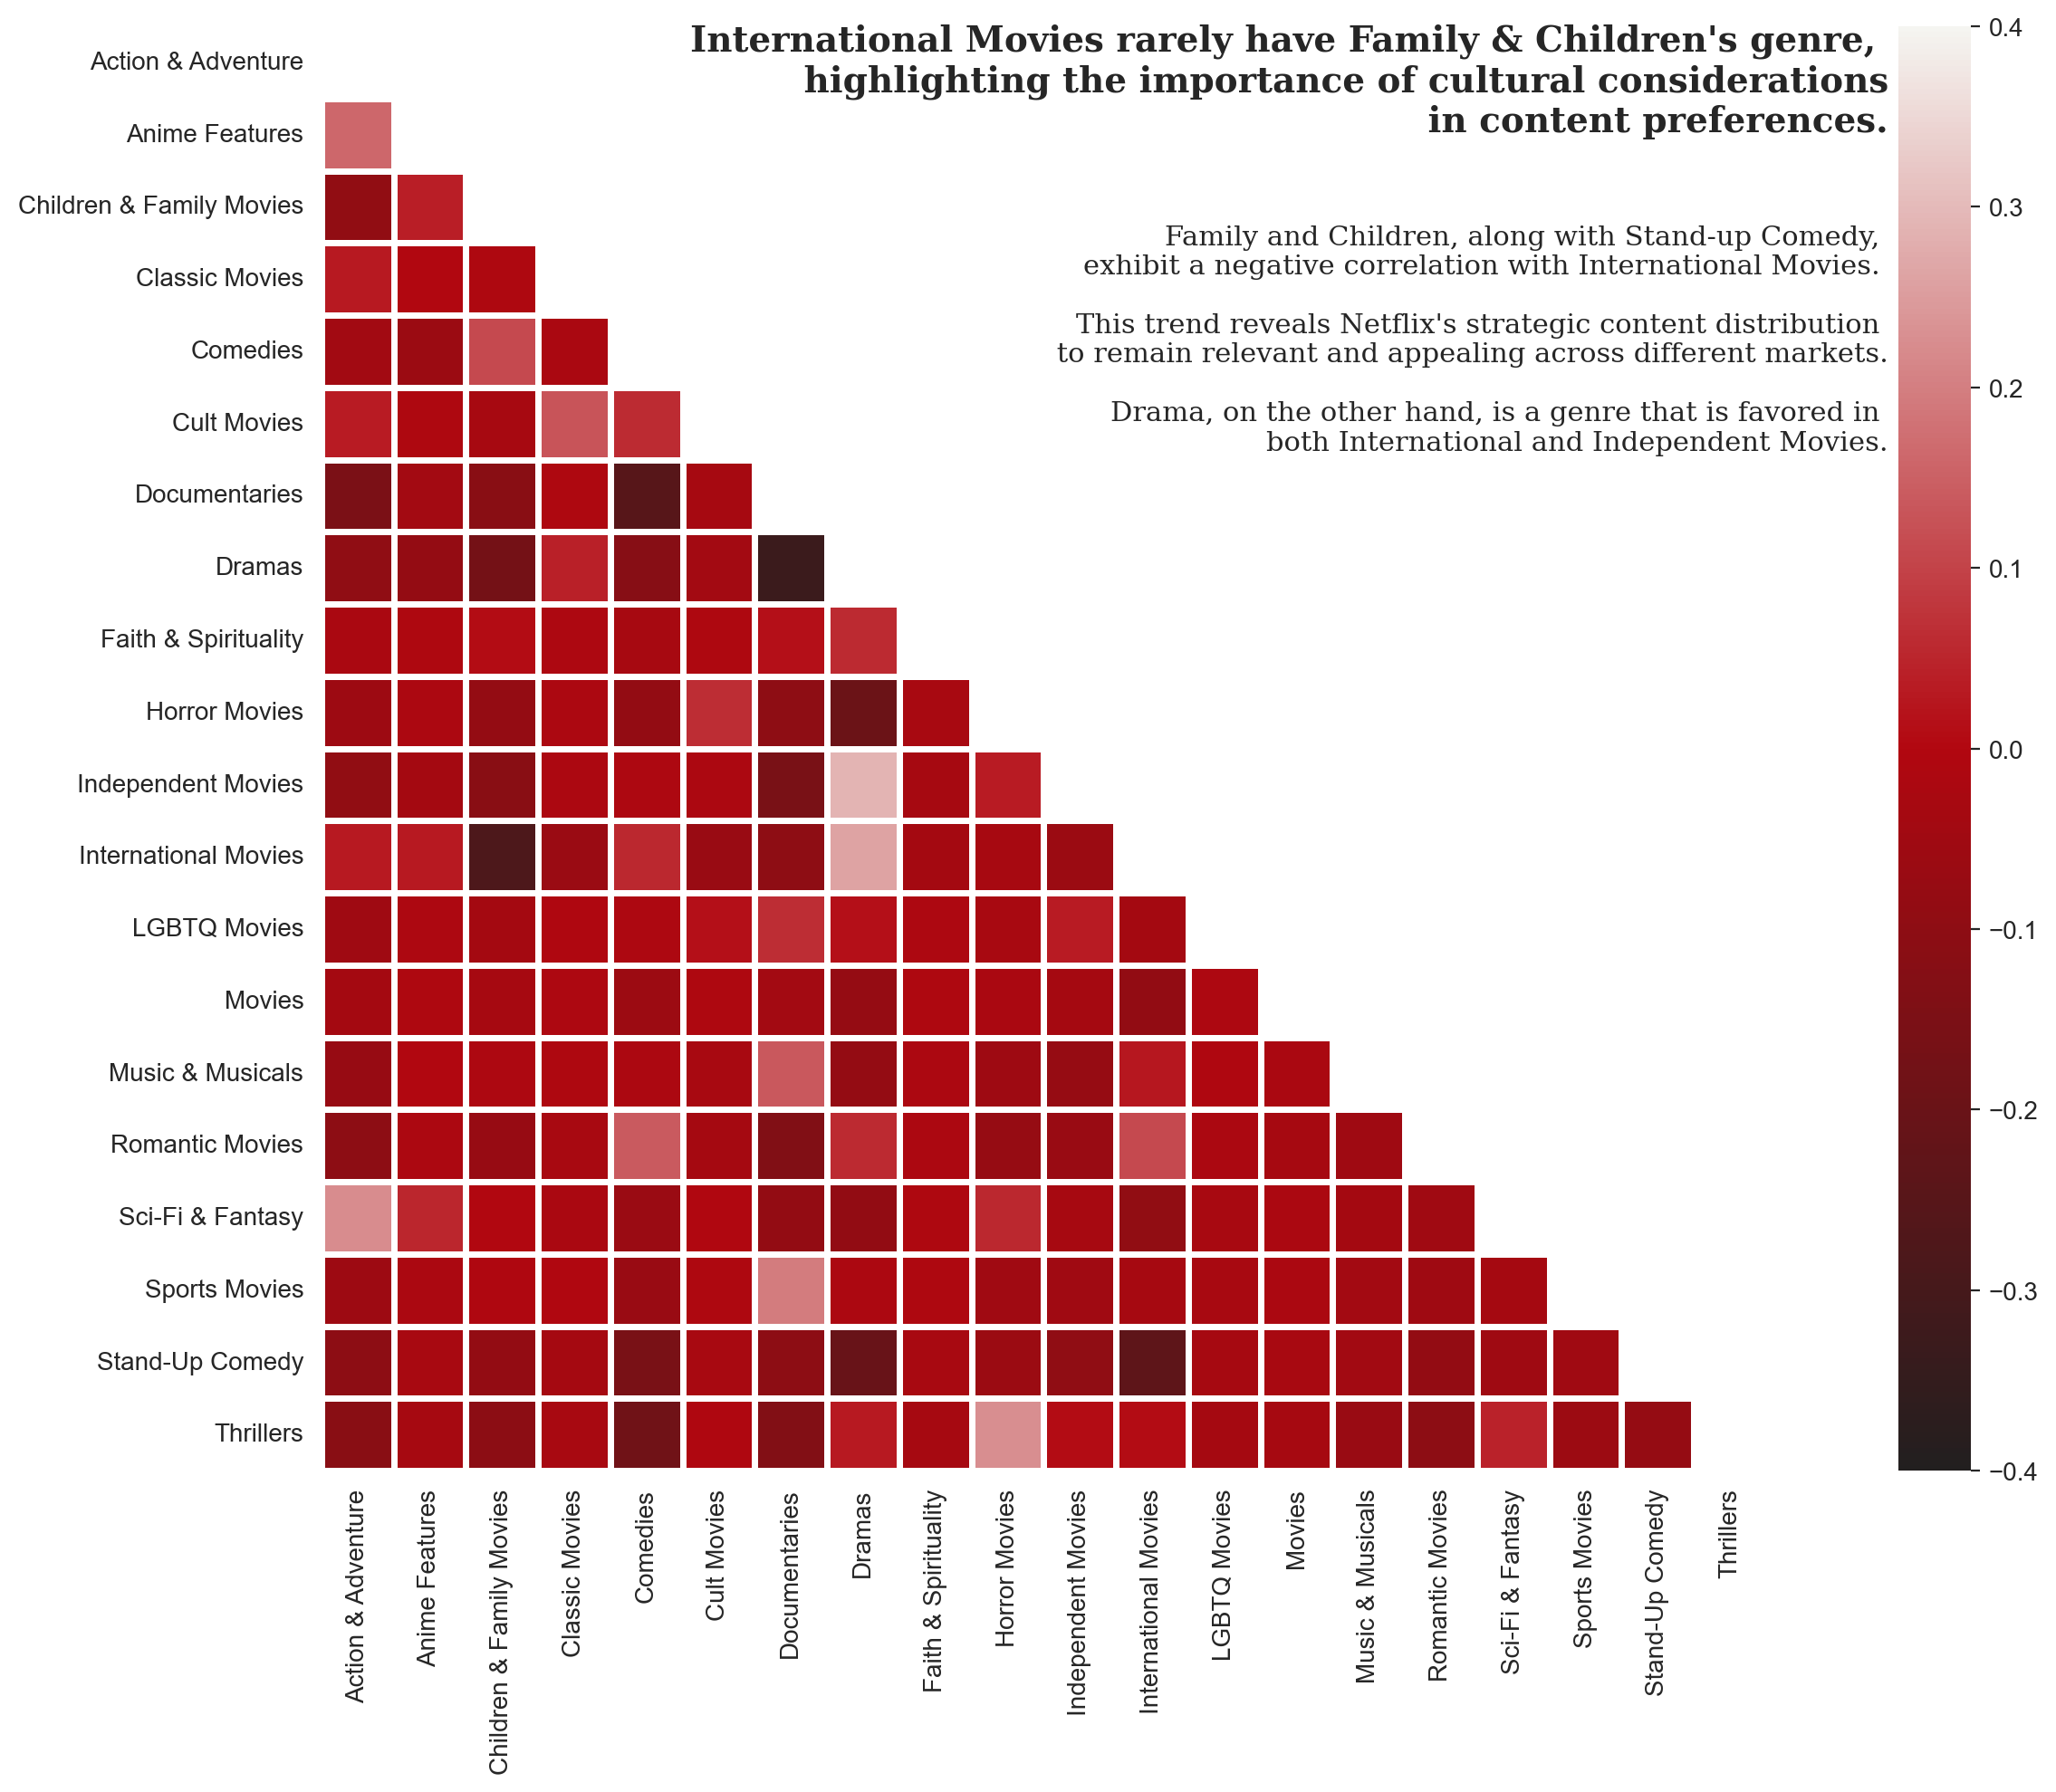

In [42]:

df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

relation_heatmap(df_movie, "Movie")

There are 22 types in the Netflix TV Show Dataset


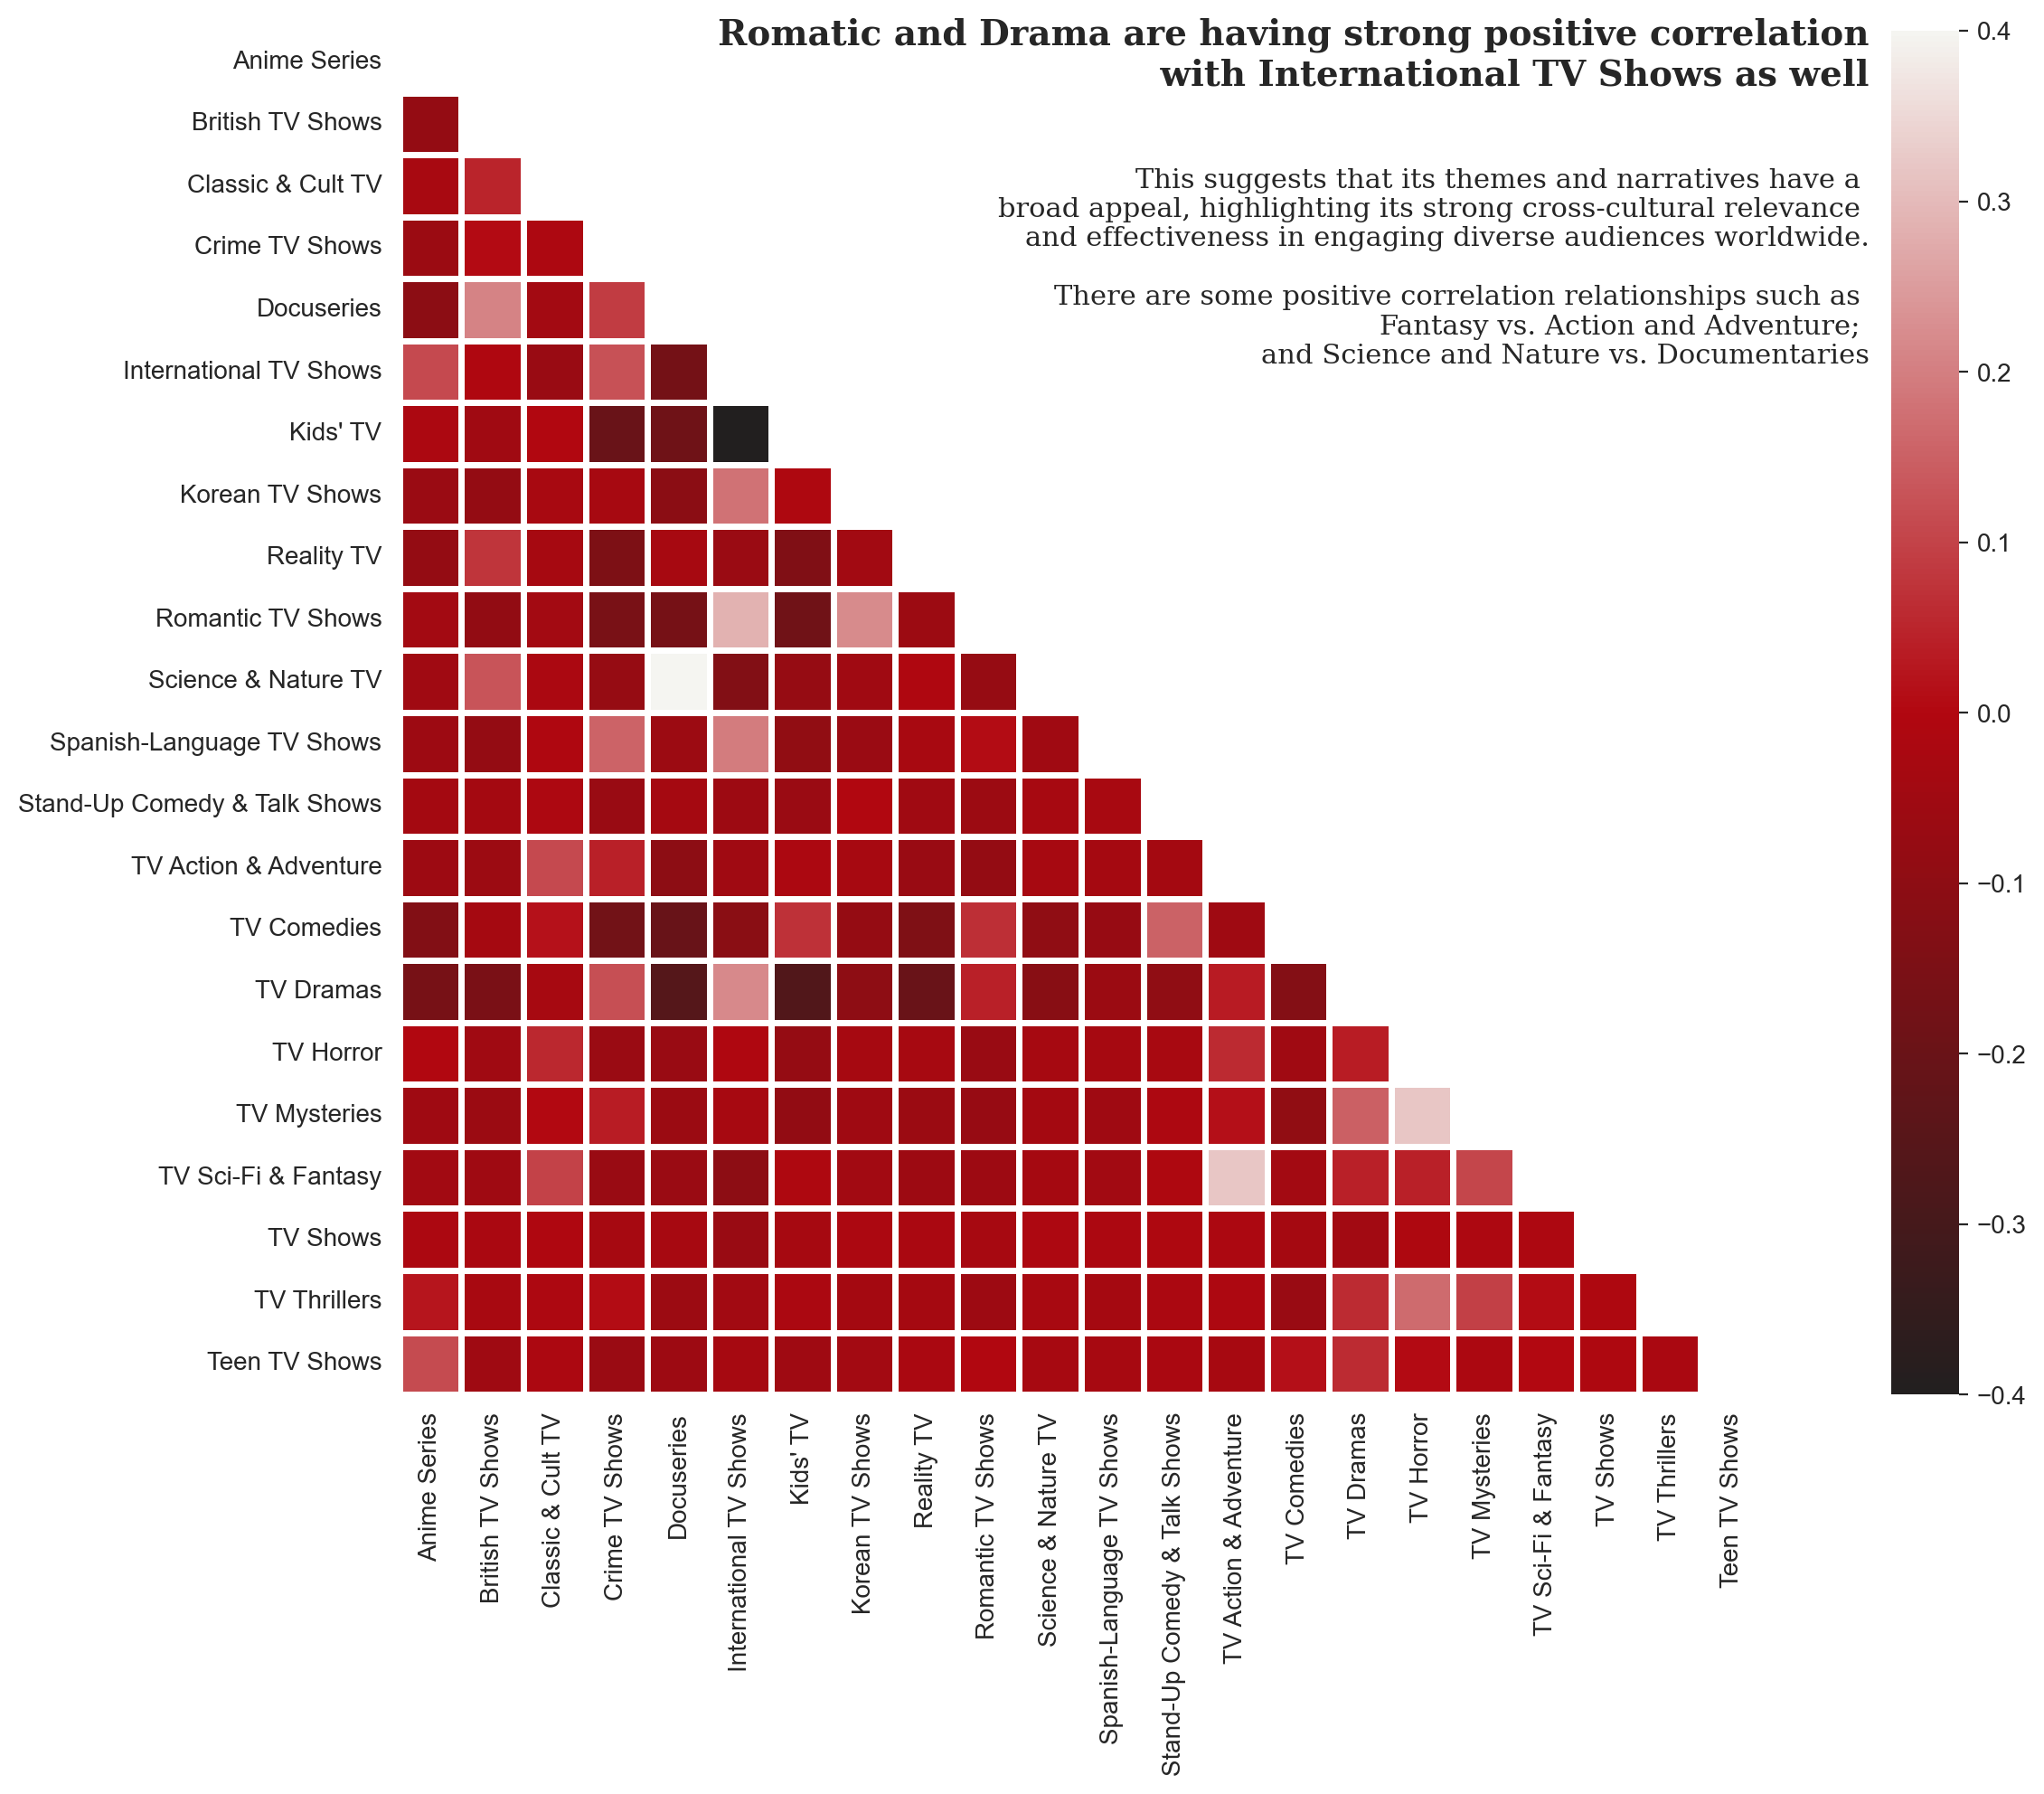

In [43]:
relation_heatmap(df_tv, 'TV Show')

# Target Ages
Does Netflix uniformly target certain demographics? Or does this vary by country?

In [22]:
data = df.groupby('first_country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()
data = data['first_country']

df_heatmap = df.loc[df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

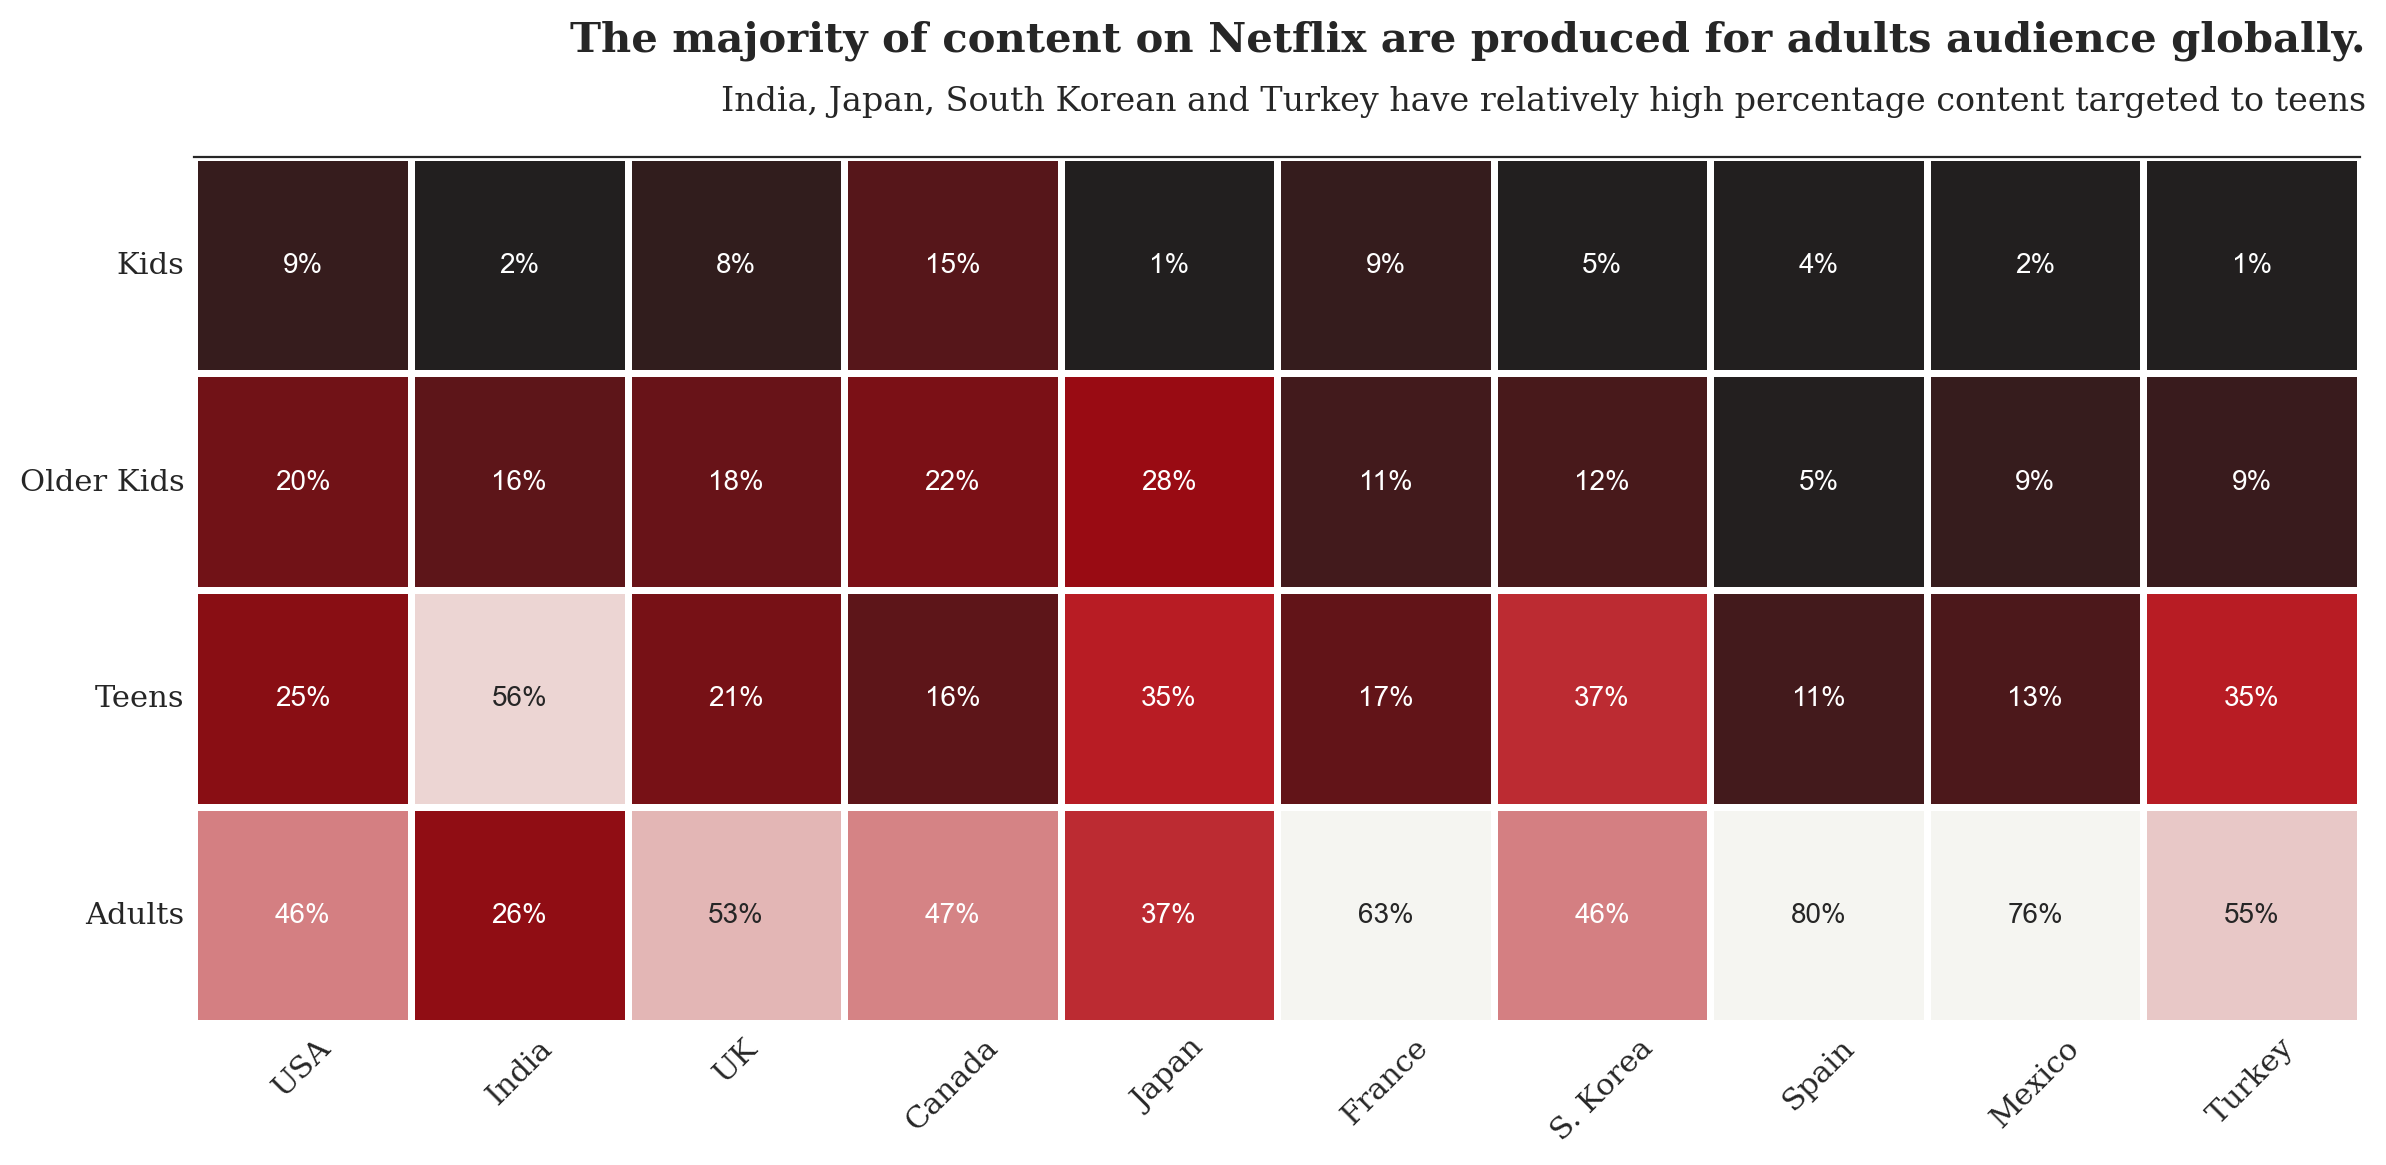

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Turkey']

age_order = ['Kids','Older Kids','Teens','Adults']
age_heatmap_df = df_heatmap.loc[age_order,country_order2]
sns.heatmap(age_heatmap_df,cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True, fmt="1.0%",vmax=.6,vmin=0.05,annot_kws={"fontsize":10})

ax.spines['top'].set_visible(True)

fig.text(.99, .725, 'The majority of content on Netflix are produced for adults audience globally.', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'India, Japan, South Korean and Turkey have relatively high percentage content targeted to teens',ha='right', fontsize=12,fontfamily='serif') 
# Loop over data dimensions and create text annotations.


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=45, fontsize=11)

ax.set(ylabel="", xlabel="")   
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.savefig("images/ages_countries", bbox_inches='tight', dpi=300)
plt.show()

In [24]:
def background (self, set_facecolor, tick_params):
    self = self
    self. set_facecolor = ('black')
    self.tick_params (axis='y', colors='white')
    return self, set_facecolor, tick_params

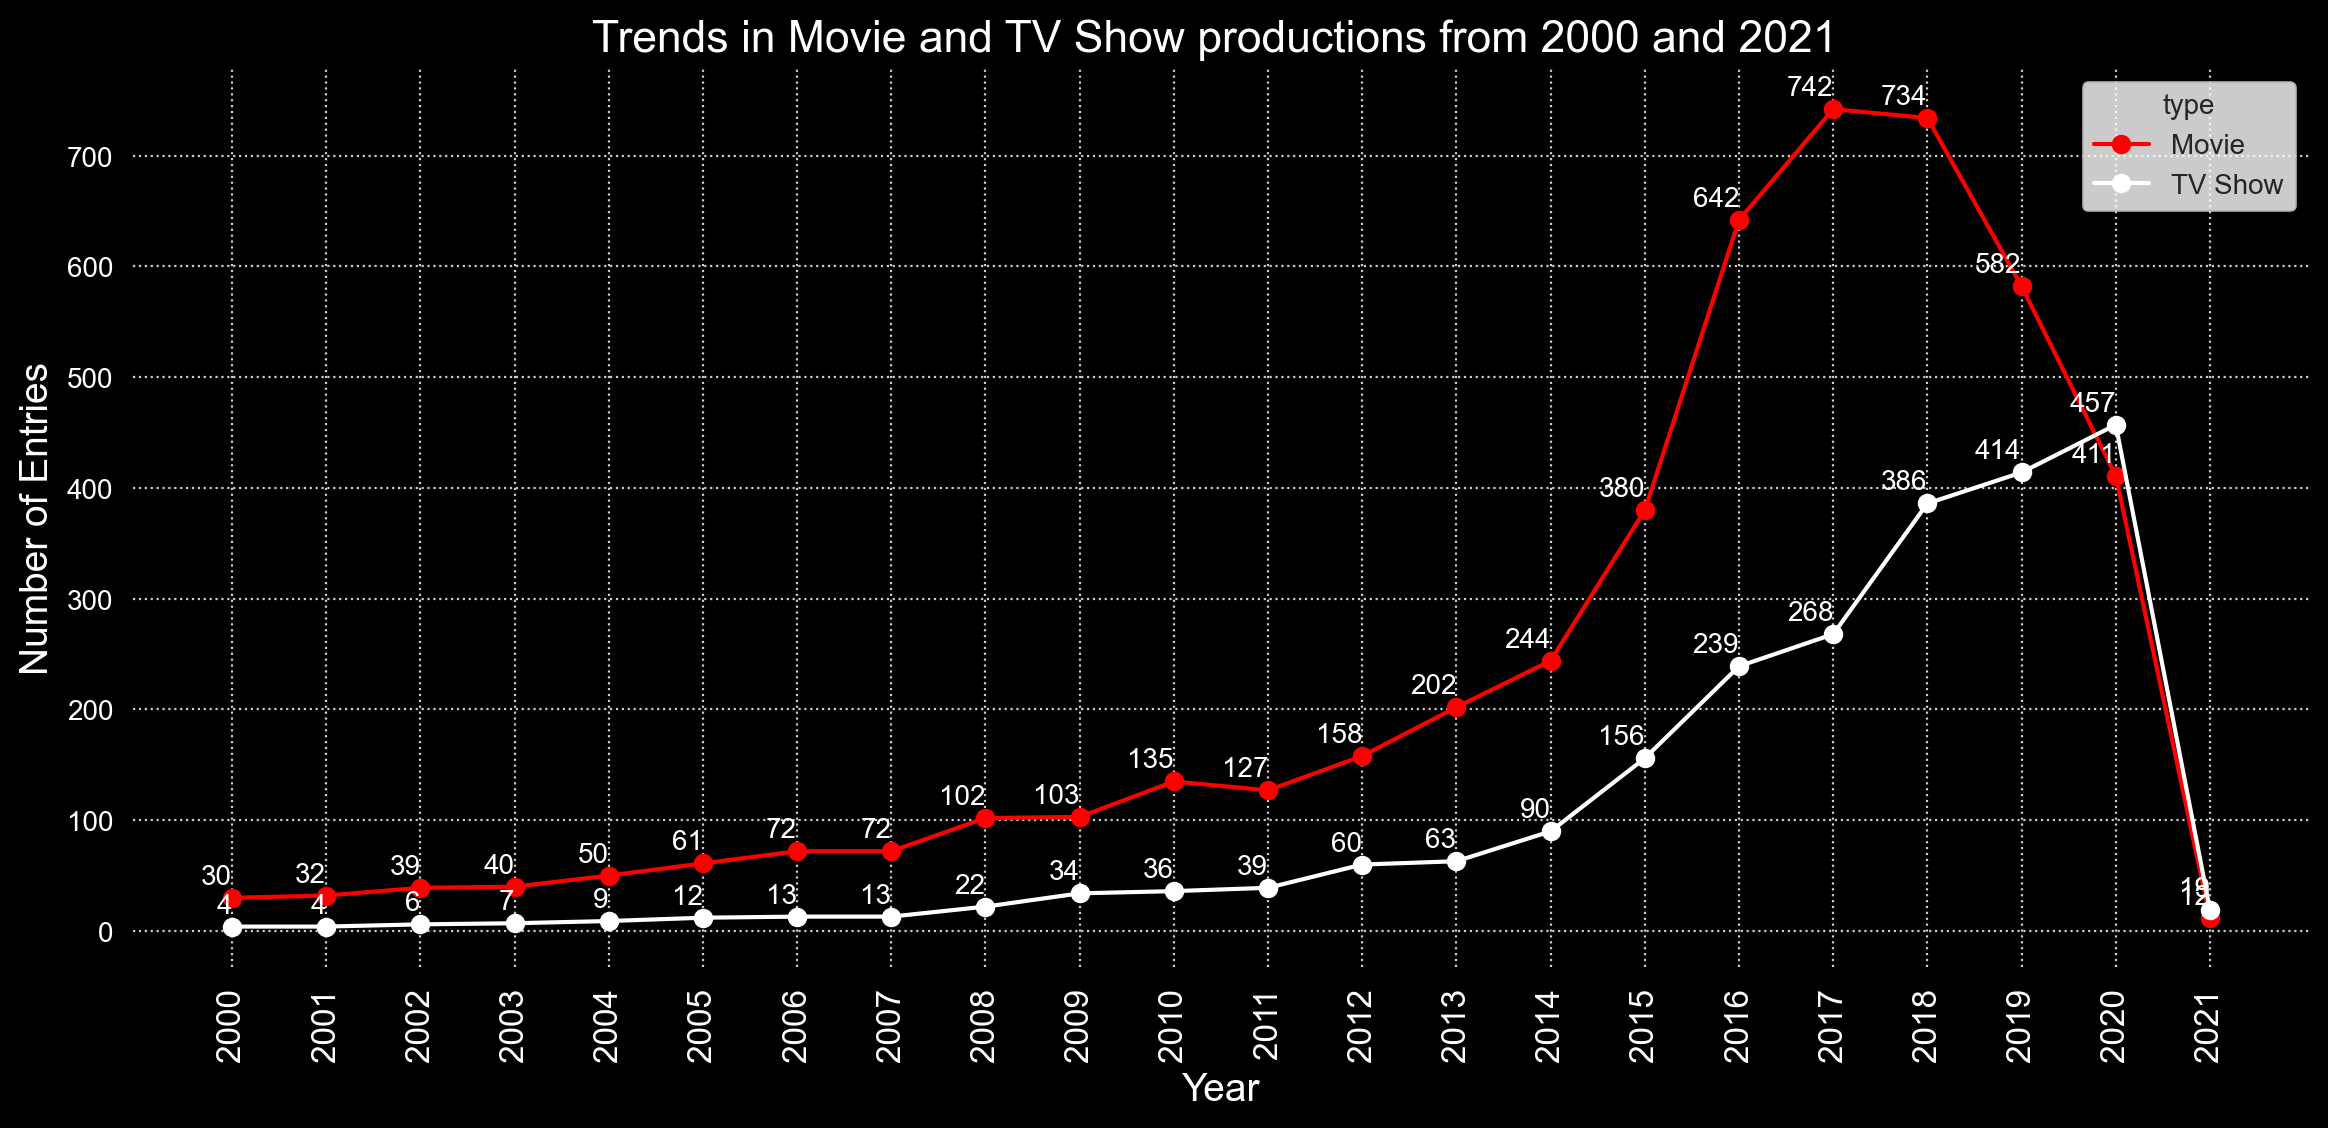

In [25]:
# Set figure size and background color
fig, ax = plt.subplots(figsize=(12, 6), facecolor='black')

# Filter data for years after 2000
df_filtered = df[df['release_year'] >= 2000]

# Group by release year and type, then plot line graph
df_group = df_filtered.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Plotting the line chart
df_group.plot.line(ax=ax, color=['red', 'white'], marker='o')

# Set plot title and axis labels
plt.title('Trends in Movie and TV Show productions from 2000 and 2021 ', fontsize=16, color='white',)
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Number of Entries', fontsize=14, color='white')

# Add grid lines
plt.grid(True, linestyle='dotted')
ax.spines[:].set_visible(False)

# Set background color and tick color
ax.set_facecolor('black')
ax.tick_params(axis='y', colors='white')

# Set x-axis ticks and labels
years = np.arange(df_group.index.min(), df_group.index.max() + 1)
plt.xticks(years, rotation=90, fontsize=12, color='white')

# Add data labels to each point
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = "{:.0f}".format(y)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='right', color='white')
plt.tight_layout(pad=2)
# Display the plot
plt.show()